#### Análise exploratória dos dados

1. Bibliotecas utilizadas

In [1]:
import pandas as pd # pandas
import matplotlib.pyplot as plt # matplotlib
from wordcloud import WordCloud # wordcloud

2. Leitura do dataset utilizado

In [2]:
df_sentimentos = pd.read_csv("./data/data.csv",sep=",",encoding="utf-8")
df_sentimentos.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


3. extraindo algumas infos

In [3]:
# Visualizando os dados de forma aleatória
display(df_sentimentos.sample(5))

,Sentence,Sentiment
997,HELSINKI Thomson Financial - Shares in Cargote...,negative
3758,"Operating profit totaled EUR 5.5 mn , up from ...",positive
3423,The authorisation is in force until the end of...,neutral
918,"Karachi , Sept. 14 -- Ixonos , a world leader ...",neutral
1389,According to CEO Matti Perkonoja of the parent...,negative


In [4]:
# Visualizando informações gerais sobre o dataset
df_sentimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
# Visualizando a distribuição dos dados
colunas = list(df_sentimentos.columns)
for coluna in colunas:
	print(f"Distribuição da coluna {coluna}")
	print(df_sentimentos[coluna].value_counts())
	print("\n")

Distribuição da coluna Sentence
Sentence
Managing Director 's comments : `` Net sales for the first quarter were notably lower than a year before , especially in Finland , Russia and the Baltic countries .                                                          2
Scanfil , a systems supplier and contract manufacturer to the communications sector , will give notice to 20 productional employees , and temporarily lay off 15 employees at the company 's plant in Sievi , in Finland .    2
Profit before taxes decreased to EUR 31.6 mn from EUR 50.0 mn the year before .                                                                                                                                               2
Pretax loss totalled EUR 49.9 mn , compared to a loss of EUR 15.4 mn in the corresponding period in 2008 .                                                                                                                    2
Operating loss of the Pulp & Paper Machinery unit was over EUR 

In [6]:
# Tamanho do dataset
print("Tamanho do dataset")
print("Quantidade de linhas: ", df_sentimentos.shape[0])
print("Quantidade de colunas: ", df_sentimentos.shape[1])

Tamanho do dataset
Quantidade de linhas:  5842
Quantidade de colunas:  2


In [7]:
# Visualizando a quantidade de dados faltantes
print("Dados faltantes: ")
print(df_sentimentos.isnull().sum())

Dados faltantes: 
Sentence     0
Sentiment    0
dtype: int64


In [8]:
# Ver estatísticas descritivas do datasetp
print(df_sentimentos.describe())

                                                 Sentence Sentiment
count                                                5842      5842
unique                                               5322         3
top     Managing Director 's comments : `` Net sales f...   neutral
freq                                                    2      3130


In [9]:
df_sentimentos['sentence_length'] = df_sentimentos['Sentence'].apply(lambda x: len(x.split()))
df_sentimentos['sentence_length'].describe()

count    5842.000000
mean       21.004793
std        10.306465
min         2.000000
25%        13.000000
50%        19.000000
75%        27.000000
max        81.000000
Name: sentence_length, dtype: float64

In [10]:
#valores duplicados
print("Valores duplicados: ")
df_sentimentos_duplicados = df_sentimentos[df_sentimentos.duplicated()]
display(df_sentimentos_duplicados)
# Dropando valores duplicados
print("Dropando valores duplicados: ")
df_sentimentos_clean = df_sentimentos.drop_duplicates()
display(df_sentimentos_clean)

Valores duplicados: 


,Sentence,Sentiment,sentence_length
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral,48
1859,SSH Communications Security Corporation is hea...,neutral,11
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral,11
3272,The company serves customers in various indust...,neutral,45
3986,The issuer is solely responsible for the conte...,neutral,12
5342,The report profiles 614 companies including ma...,neutral,51


Dropando valores duplicados: 


,Sentence,Sentiment,sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,17
5838,Nordic Walking was first used as a summer trai...,neutral,14
5839,"According shipping company Viking Line , the E...",neutral,16
5840,"In the building and home improvement trade , s...",neutral,18


In [11]:
# pegando os dados duplicados e vendo que algumas sentencas estão com sentimentos diferentes
df_sentimentos_duplicados = df_sentimentos_clean[df_sentimentos_clean.duplicated(subset=['Sentence'], keep=False)]
df_sentimentos_duplicados_ordenados = df_sentimentos_duplicados.sort_values(by='Sentence')
display(df_sentimentos_duplicados_ordenados)
print("Quantidade de sentimentos: ", df_sentimentos_duplicados_ordenados['Sentiment'].value_counts())

,Sentence,Sentiment,sentence_length
3685,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",negative,46
4578,"( ADP News ) - Feb 11 , 2009 - Finnish wood pr...",neutral,46
1488,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",negative,44
3765,"( ADP News ) - Feb 12 , 2009 - Finnish constru...",neutral,44
1051,"( ADP News ) - Feb 4 , 2009 - Finnish broadban...",negative,48
...,...,...,...
5612,down to EUR5 .9 m H1 '09 3 August 2009 - Finni...,neutral,43
904,in Finland Finnish pharmaceutical company Orio...,neutral,35
3368,in Finland Finnish pharmaceutical company Orio...,negative,35
3075,stores 16 March 2010 - Finnish stationery and ...,negative,44


Quantidade de sentimentos:  Sentiment
negative    514
neutral     514
Name: count, dtype: int64


In [12]:
#deixando somente os dados unicos
df_sentimentos_unicos = df_sentimentos_clean.drop_duplicates(subset=['Sentence'], keep=False)
df_sentimentos_unicos

,Sentence,Sentiment,sentence_length
0,The GeoSolutions technology will leverage Bene...,positive,32
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11
2,"For the last quarter of 2010 , Componenta 's n...",positive,39
3,According to the Finnish-Russian Chamber of Co...,neutral,20
4,The Swedish buyout firm has sold its remaining...,neutral,23
...,...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative,10
5836,Daily Mail parent company in talks with potent...,positive,18
5838,Nordic Walking was first used as a summer trai...,neutral,14
5839,"According shipping company Viking Line , the E...",neutral,16


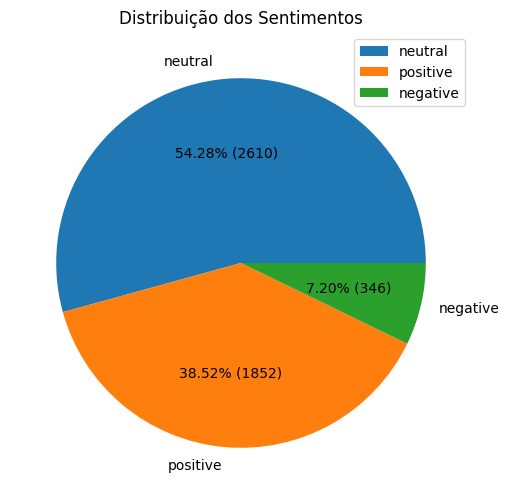

In [13]:
sentimentos_counts = df_sentimentos_unicos['Sentiment'].value_counts()
# Criar um gráfico de pizza
plt.figure(figsize=(10,6))
patches, texts, autotexts = plt.pie(sentimentos_counts, labels = sentimentos_counts.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,(p/100)*sentimentos_counts.sum()))
plt.title('Distribuição dos Sentimentos')
plt.legend(patches, sentimentos_counts.index, loc="best")
plt.show()

In [14]:
print("Exemplo: ",df_sentimentos_unicos['Sentence'].iloc[1])

Exemplo:  $ESI on lows, down $1.50 to $2.50 BK a real possibility


#### Tratamento dos dados

1. Importação das bibliotecas utilizadas no processo de tratamento dos dados

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

2. Downloads necessários

In [36]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/zairo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/zairo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zairo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

3. Limpeza dos dados

In [17]:
# Definir o idioma das stopwords
stop_words = set(stopwords.words('english'))

In [37]:
def clean_text(texto):
    palavras = word_tokenize(texto)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(palavra.lower()) for palavra in palavras if palavra.isalpha() not in stop_words]
    return text

In [38]:
df_sentimentos_unicos = df_sentimentos_unicos.copy()
df_sentimentos_unicos['cleaned_sentence'] = df_sentimentos_unicos['Sentence'].apply(lambda x: clean_text(x))
df_sentimentos_unicos['cleaned_sentence_length'] = df_sentimentos_unicos['cleaned_sentence'].apply(lambda x: len(x))
df_sentimentos_unicos.head(5)

,Sentence,Sentiment,sentence_length,cleaned_sentence,cleaned_sentence_length,Sentence_sents,qtd_sentencas
0,The GeoSolutions technology will leverage Bene...,positive,32,"[the, geosolutions, technology, will, leverage...",32,[The GeoSolutions technology will leverage Ben...,1
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,11,"[$, esi, on, low, ,, down, $, 1.50, to, $, 2.5...",15,"[$ESI on lows, down $1.50 to $2.50 BK a real p...",1
2,"For the last quarter of 2010 , Componenta 's n...",positive,39,"[for, the, last, quarter, of, 2010, ,, compone...",39,"[For the last quarter of 2010 , Componenta 's ...",1
3,According to the Finnish-Russian Chamber of Co...,neutral,20,"[according, to, the, finnish-russian, chamber,...",20,[According to the Finnish-Russian Chamber of C...,1
4,The Swedish buyout firm has sold its remaining...,neutral,23,"[the, swedish, buyout, firm, ha, sold, it, rem...",23,[The Swedish buyout firm has sold its remainin...,1


4. Tratamento dos dados

In [28]:
def quebrar_sentencas(text):
    return nltk.sent_tokenize(text)

In [29]:
# Aplicar a função na coluna 'Sentence'
df_sentimentos_unicos['Sentence_sents'] = df_sentimentos_unicos['Sentence'].apply(quebrar_sentencas)

# Contar o número de sentenças em cada linha
df_sentimentos_unicos['qtd_sentencas'] = df_sentimentos_unicos['Sentence_sents'].apply(len)

# Filtrar e imprimir as linhas onde o número de sentenças é maior ou igual a 2
df_sentimentos_unicos[df_sentimentos_unicos['qtd_sentencas'] >= 2]

,Sentence,Sentiment,sentence_length,cleaned_sentence,cleaned_sentence_length,Sentence_sents,qtd_sentencas
11,$SAP Q1 disappoints as #software licenses down...,negative,18,"[$, sap, q1, disappoints, as, #, software, lic...",30,[$SAP Q1 disappoints as #software licenses dow...,3
39,$AAPL afternoon selloff as usual will be bruta...,negative,16,"[$, aapl, afternoon, selloff, as, usual, will,...",19,[$AAPL afternoon selloff as usual will be brut...,2
60,$VIPS similar pattern like beginning of May. D...,positive,19,"[$, vips, similar, pattern, like, beginning, o...",25,"[$VIPS similar pattern like beginning of May.,...",3
65,Most bullish stocks on Twitter during this dip...,positive,20,"[most, bullish, stocks, on, twitter, during, t...",34,[Most bullish stocks on Twitter during this di...,2
121,Name of Applicant : Jot Automation OYName of I...,neutral,31,"[name, of, applicant, :, jot, automation, oyna...",32,[Name of Applicant : Jot Automation OYName of ...,2
...,...,...,...,...,...,...,...
5778,Still short $LNG from $11.70 area...next stop ...,negative,24,"[still, short, $, lng, from, $, 11.70, area, ....",31,[Still short $LNG from $11.70 area...next stop...,3
5808,"$QCOM The indicator RSI is over 50, which stan...",positive,17,"[$, qcom, the, indicator, rsi, is, over, 50, ,...",23,"[$QCOM The indicator RSI is over 50, which sta...",2
5809,$FB they are hitting everything in sight.shor...,negative,10,"[$, fb, they, are, hitting, everything, in, si...",12,[$FB they are hitting everything in sight.sho...,2
5810,$GOOG resistance turned support? It,positive,5,"[$, goog, resistance, turned, support, ?, it]",7,"[$GOOG resistance turned support?, It]",2


In [30]:
df_sentimentos_unicos.loc[11,'Sentence']

'$SAP Q1 disappoints as #software licenses down. Real problem? #Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5'

In [31]:
for frase in df_sentimentos_unicos.loc[11, 'Sentence_sents']:
    print(frase)

$SAP Q1 disappoints as #software licenses down.
Real problem?
#Cloud growth trails $MSFT $ORCL $GOOG $CRM $ADBE https://t.co/jNDphllzq5


In [32]:
df_sentimentos_unicos[df_sentimentos_unicos['qtd_sentencas'] >= 2].value_counts('Sentiment')

Sentiment
positive    153
negative     93
neutral      57
Name: count, dtype: int64

5. Nuvem de palavras

In [33]:
def nuvem_palavras(sentiment):
    df = df_sentimentos_unicos[df_sentimentos_unicos['Sentiment'] == sentiment]
    text = ' '.join(palavra for sublist in df.cleaned_sentence for palavra in sublist)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nuvem de palavras para o sentimento: {sentiment}")
    plt.show()

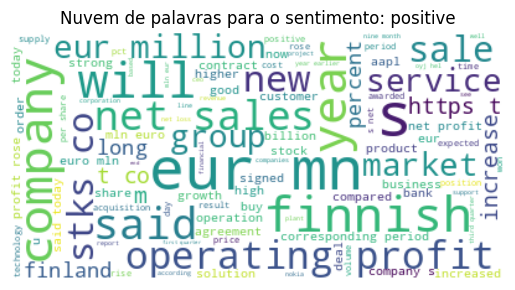

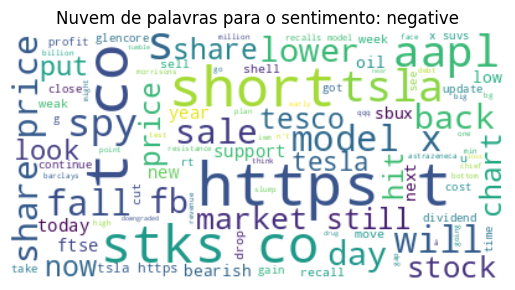

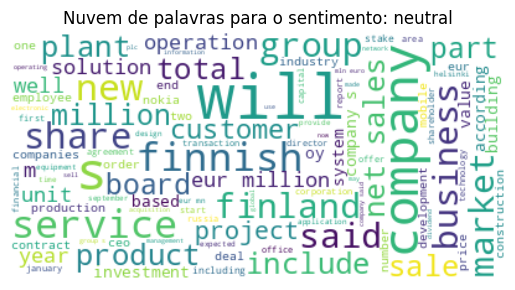

In [34]:
sentimentos = df_sentimentos_unicos['Sentiment'].unique()
for sentimento in sentimentos:
	nuvem_palavras(sentimento)

In [ ]:
df['Sentimento_Num'] = df['Sentimento'].replace({'Negativo': 0, 'Neutro': 1, 'Positivo': 2})